## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
#Running provided code:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

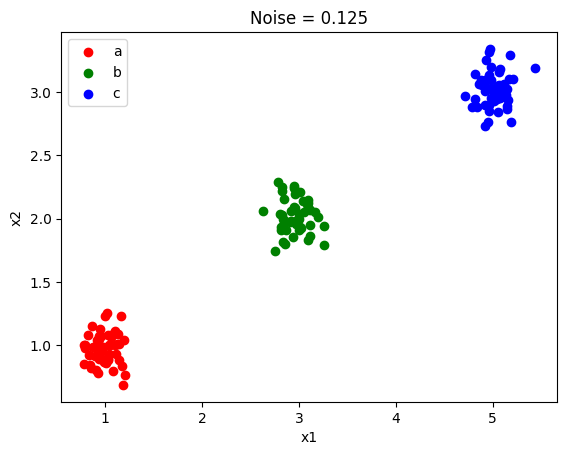

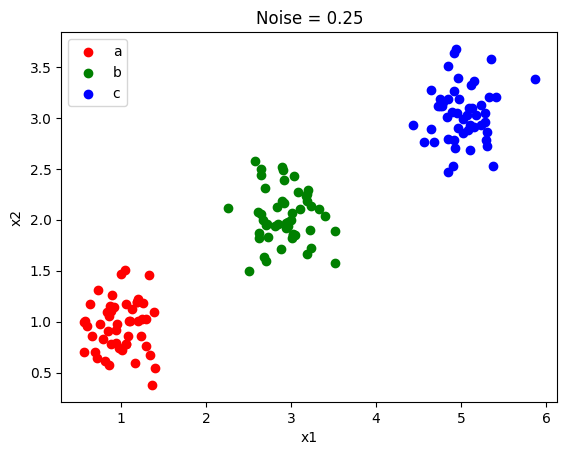

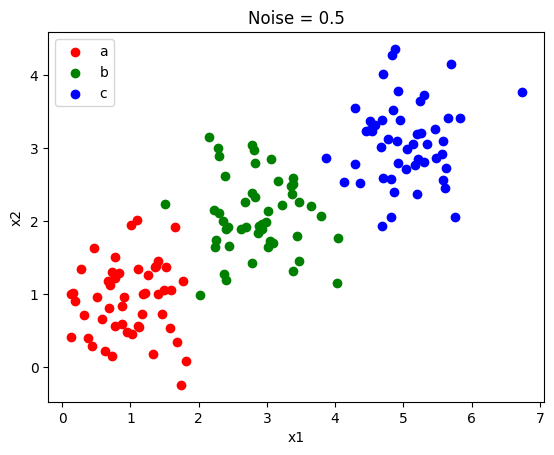

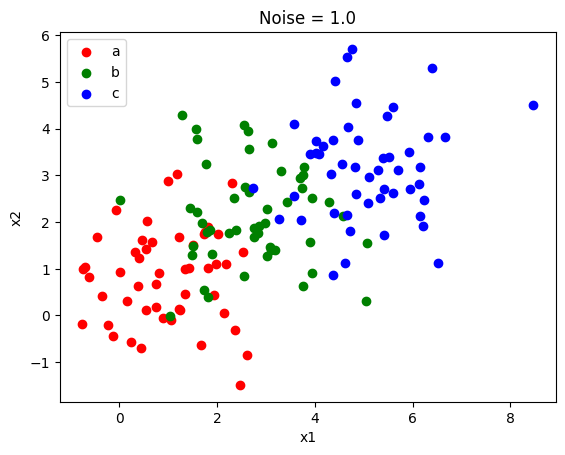

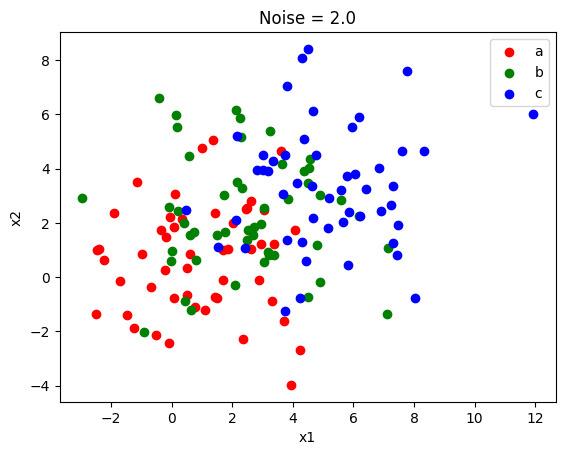

In [2]:
#2 Scatterplots:
import matplotlib.pyplot as plt

def plot_clusters(df, title):
    for group, color in zip(['a', 'b', 'c'], ['red', 'green', 'blue']):
        group_data = df[df['group'] == group]
        plt.scatter(group_data['x1'], group_data['x2'], label=group, color=color)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()


plot_clusters(df0_125, 'Noise = 0.125')
plot_clusters(df0_25, 'Noise = 0.25')
plot_clusters(df0_5, 'Noise = 0.5')
plot_clusters(df1_0, 'Noise = 1.0')
plot_clusters(df2_0, 'Noise = 2.0')


2: low noise has more clear distinct clusters. Moderate to high noise blends the clusters and makes their visual separability harder

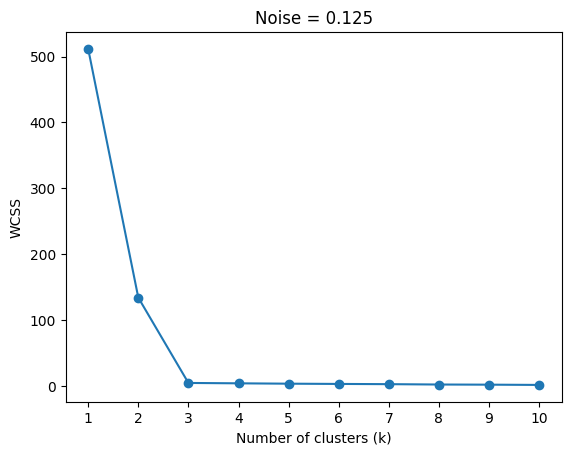

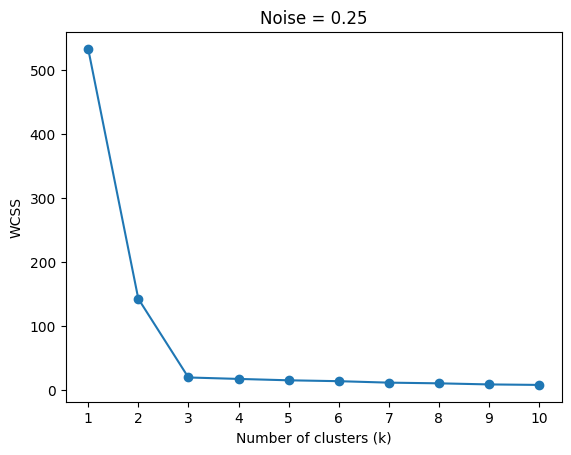

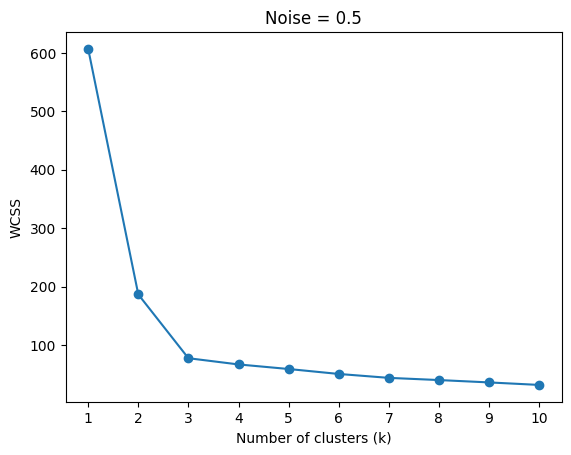

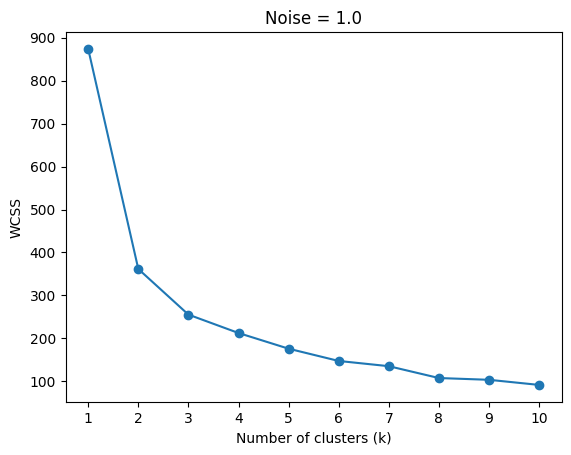

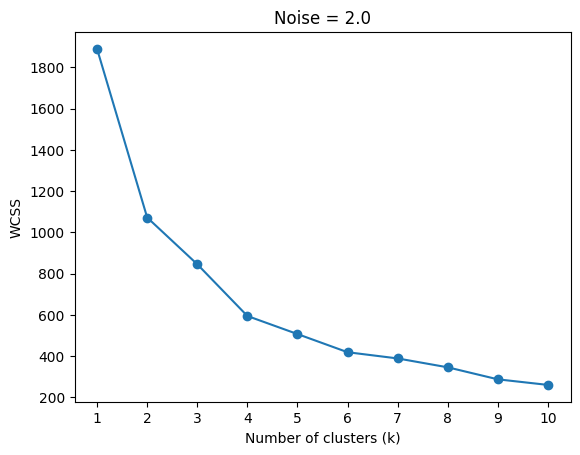

In [3]:
#3 scree plot:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def scree_plot(df, title):
    X = df[['x1', 'x2']].values
    wcss = []

    # Trying different values of k
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_) #within cluster sum of squares for the diff values of k

    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.xticks(range(1, 11))
    plt.show()

scree_plot(df0_125, 'Noise = 0.125')
scree_plot(df0_25, 'Noise = 0.25')
scree_plot(df0_5, 'Noise = 0.5')
scree_plot(df1_0, 'Noise = 1.0')
scree_plot(df2_0, 'Noise = 2.0')


4: Explain the intuition of the elbow, using this numerical simulation as an example.
The elbow in a scree plot marks the point where increasing the number of clusters no longer reduces the within-cluster sum of squares. This indicates the optimal number of clusters, where further increases in k offer diminishing returns in improving the fit. As noise increases in the data, the elbow becomes less clear and harder to identify, as the clusters become less distinct and more overlapping.



**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [6]:
#1:
import pandas as pd
df = pd.read_csv("2022 election cycle fundraising.csv")
df.head()


,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [7]:
#1
df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe()


,Raised,Spent,Cash on Hand,Debts
count,537,537,537,537
unique,534,534,533,128
top,$0,$0,$0,$0
freq,4,4,5,404


In [10]:
#1
# Removing dollar signs and commas and converting to numeric
df['Raised'] = pd.to_numeric(df['Raised'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
df['Spent'] = pd.to_numeric(df['Spent'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
df['Cash on Hand'] = pd.to_numeric(df['Cash on Hand'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
df['Debts'] = pd.to_numeric(df['Debts'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

#Missing values
df.isnull().sum()
df['Raised'].fillna(0, inplace=True)
df['Spent'].fillna(0, inplace=True)
df['Cash on Hand'].fillna(0, inplace=True)
df['Debts'].fillna(0, inplace=True)

#negative values
df[['Raised', 'Cash on Hand']] = df[['Raised', 'Cash on Hand']].clip(lower=0)



<ipython-input-10-39dedb17e110>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Raised'].fillna(0, inplace=True)
<ipython-input-10-39dedb17e110>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [11]:
#cleaned columns
df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe()


,Raised,Spent,Cash on Hand,Debts
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,3.595632e+06,2.875221e+06,1.790479e+06,1.268609e+05
std,7.375033e+06,6.332135e+06,2.803924e+06,8.426411e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.632370e+05,7.325080e+05,4.148470e+05,0.000000e+00
50%,1.731244e+06,1.239741e+06,9.592380e+05,0.000000e+00
75%,3.360517e+06,2.505998e+06,1.924564e+06,0.000000e+00
max,8.658147e+07,7.595981e+07,2.276298e+07,1.330200e+07


In [12]:
#2:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# normalising 'Raised' and 'Spent'
df[['Raised', 'Spent']] = scaler.fit_transform(df[['Raised', 'Spent']])


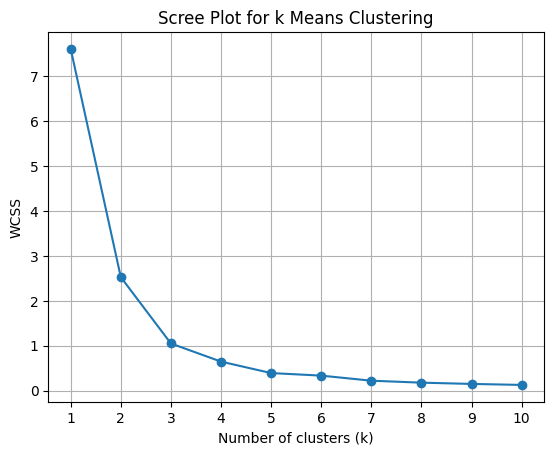

In [18]:
#2 Scree Plot:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df[['Raised', 'Spent']]

#  WCSS for  values of k (1 to 10)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Scree Plot for k Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


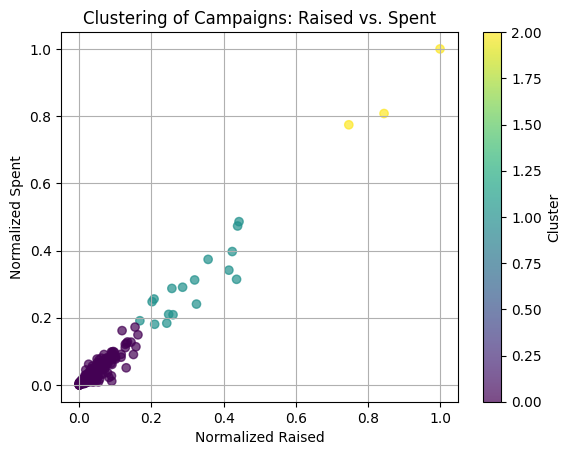

In [14]:
#2
kmeans = KMeans(n_clusters=3, random_state=100)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot for 'Raised' vs. 'Spent'
plt.scatter(df['Raised'], df['Spent'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Clustering of Campaigns: Raised vs. Spent')
plt.xlabel('Normalized Raised')
plt.ylabel('Normalized Spent')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [16]:
#2
cluster_sizes = df['Cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2)

#Candidates in the smallest two clusters
smallest_clusters_members = df[df['Cluster'].isin(smallest_clusters.index)]
smallest_clusters_members[['Cluster', 'Raised', 'Spent']]


,Cluster,Raised,Spent
2,1,0.242466,0.183753
87,1,0.438822,0.472999
89,1,0.414638,0.341554
115,1,0.167887,0.191054
261,1,0.324770,0.240608
290,1,0.247648,0.209938
298,1,0.286338,0.290764
326,1,0.357061,0.373632
328,1,0.423985,0.396961
340,2,0.844764,0.807760


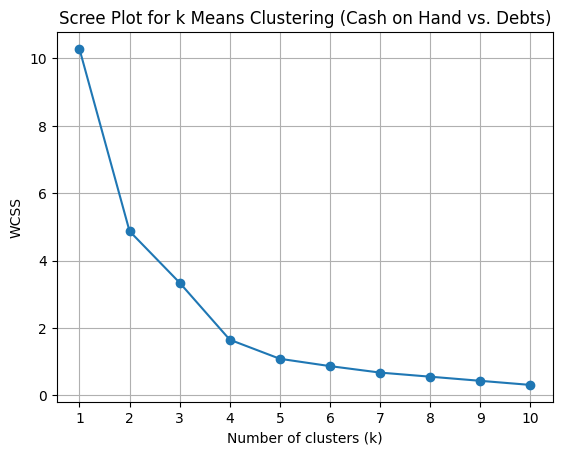

In [19]:
#3
df[['Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])
X_cash_debts = df[['Cash on Hand', 'Debts']]

# WCSS for different values of k (1 to 10)
wcss_cash_debts = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X_cash_debts)
    wcss_cash_debts.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_cash_debts, marker='o')
plt.title('Scree Plot for k Means Clustering (Cash on Hand vs. Debts)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


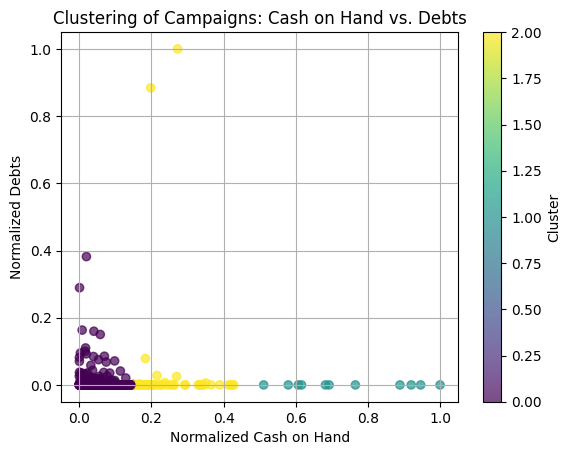

In [20]:
#3
# Applying k-means clustering with the optimal k
kmeans_cash_debts = KMeans(n_clusters=3, random_state=100)
df['Cluster_Cash_Debts'] = kmeans_cash_debts.fit_predict(X_cash_debts)

plt.scatter(df['Cash on Hand'], df['Debts'], c=df['Cluster_Cash_Debts'], cmap='viridis', alpha=0.7)
plt.title('Clustering of Campaigns: Cash on Hand vs. Debts')
plt.xlabel('Normalized Cash on Hand')
plt.ylabel('Normalized Debts')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [21]:
#3
cluster_sizes_cash_debts = df['Cluster_Cash_Debts'].value_counts()
smallest_clusters_cash_debts = cluster_sizes_cash_debts.nsmallest(2)

# Candidates in the smallest two clusters
smallest_clusters_members_cash_debts = df[df['Cluster_Cash_Debts'].isin(smallest_clusters_cash_debts.index)]
smallest_clusters_members_cash_debts[['Cluster_Cash_Debts', 'Cash on Hand', 'Debts']]


,Cluster_Cash_Debts,Cash on Hand,Debts
2,1,0.920041,0.000000
11,2,0.334651,0.000429
12,2,0.260970,0.000000
45,2,0.428376,0.000000
49,2,0.182946,0.078648
...,...,...,...
498,2,0.172302,0.000000
500,1,0.946265,0.000000
503,2,0.241665,0.000000
506,2,0.350590,0.005861


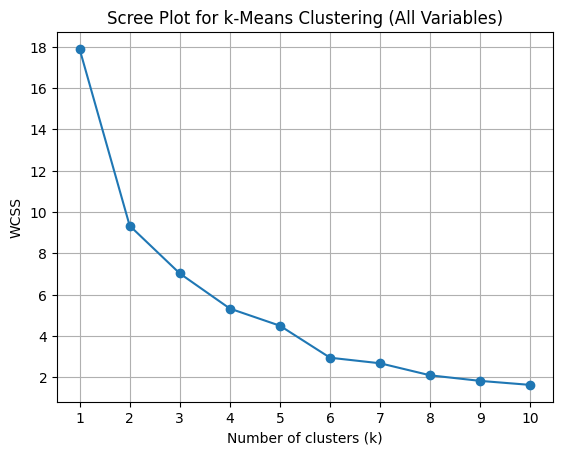

In [22]:
#4:
df[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
X_all = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]


wcss_all = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X_all)
    wcss_all.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss_all, marker='o')
plt.title('Scree Plot for k-Means Clustering (All Variables)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


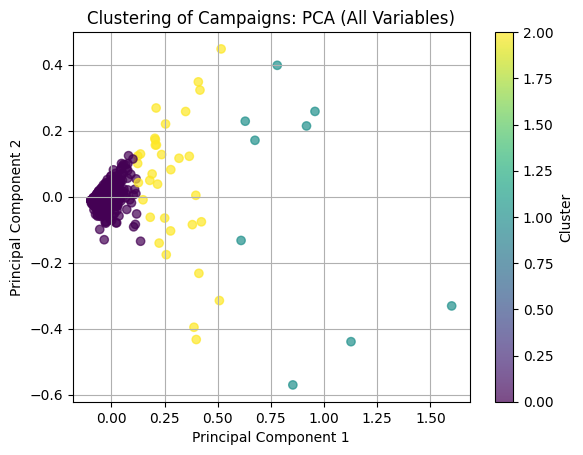

In [23]:
#4
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)
kmeans_all = KMeans(n_clusters=3, random_state=100)
df['Cluster_All'] = kmeans_all.fit_predict(X_all)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_All'], cmap='viridis', alpha=0.7)
plt.title('Clustering of Campaigns: PCA (All Variables)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#cluster is different from previous part and when doing this graph, the PCA cluster is based on all 4 variables so they look more spread out.

5: Yes using k-mc algorithm to the election campaign finance data is helpful. By grouping candidates based on metrics, you can identify clusters that highlight specific financial behaviors. For instance, some clusters are consist of candidates with high fundraising but also significant debts which shows they may have had external funding sources. Overall using k-mc was interesting to analyze different aspect's of candidates' campaigns in the technical aspects that aren't as publically promoted.
